# Exploring the Data

**Name**: Angel Lai

**Computing ID**: Bpy2nc


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

In [31]:
df = pd.read_csv("df_arabica_clean.csv")

In [21]:
country_widget = widgets.Dropdown(
    options=['All'] + sorted(df['Country of Origin'].dropna().unique().tolist()),
    description='Country:'
)

score_widget = widgets.FloatRangeSlider(
    value=[df['Total Cup Points'].min(), df['Total Cup Points'].max()],
    min=df['Total Cup Points'].min(),
    max=df['Total Cup Points'].max(),
    step=0.1,
    description='Score range:'
)

def flavor_explorer(country, score_range):
    df2 = df.copy()
    
    # filter by score
    df2 = df2[
        (df2['Total Cup Points'] >= score_range[0]) &
        (df2['Total Cup Points'] <= score_range[1])
    ]
    
    # filter by country (if not 'All')
    if country != 'All':
        df2 = df2[df2['Country of Origin'] == country]
    
    g = sns.relplot(
        data=df2,
        x='Acidity',
        y='Body',
        hue='Country of Origin',
        size='Total Cup Points',
        kind='scatter',
        alpha=0.8
    )
    g.set(title='Flavor Profile: Acidity vs Body')
    
widgets.interact(flavor_explorer, country=country_widget, score_range=score_widget);


interactive(children=(Dropdown(description='Country:', options=('All', 'Brazil', 'Colombia', 'Costa Rica', 'El…

In [10]:
from IPython.display import clear_output, display

attributes = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity',
              'Body', 'Balance', 'Sweetness', 'Overall']


country_widget = widgets.Dropdown(
    options=['All'] + sorted(df['Country of Origin'].dropna().unique().tolist()),
    value='All',
    description='Country:'
)

out = widgets.Output()

def country_profile(country):
    with out:
        clear_output(wait=True)

        df2 = df if country == 'All' else df[df['Country of Origin'] == country]

        means = df2[attributes].mean(numeric_only=True).dropna()
        if means.empty:
            print("No data available for that selection.")
            return

        sns.set_style('whitegrid')
        fig, ax = plt.subplots(figsize=(10, 4))
        sns.barplot(x=means.index, y=means.values, ax=ax)

        ax.set_title(f'Flavor Profile for {country}')
        ax.set_ylabel('Mean Score')
        ax.set_xlabel('Attribute')
        ax.tick_params(axis='x', rotation=45)

        plt.show()

ui = widgets.interactive(country_profile, country=country_widget)
display(ui, out)

interactive(children=(Dropdown(description='Country:', options=('All', 'Brazil', 'Colombia', 'Costa Rica', 'El…

Output()

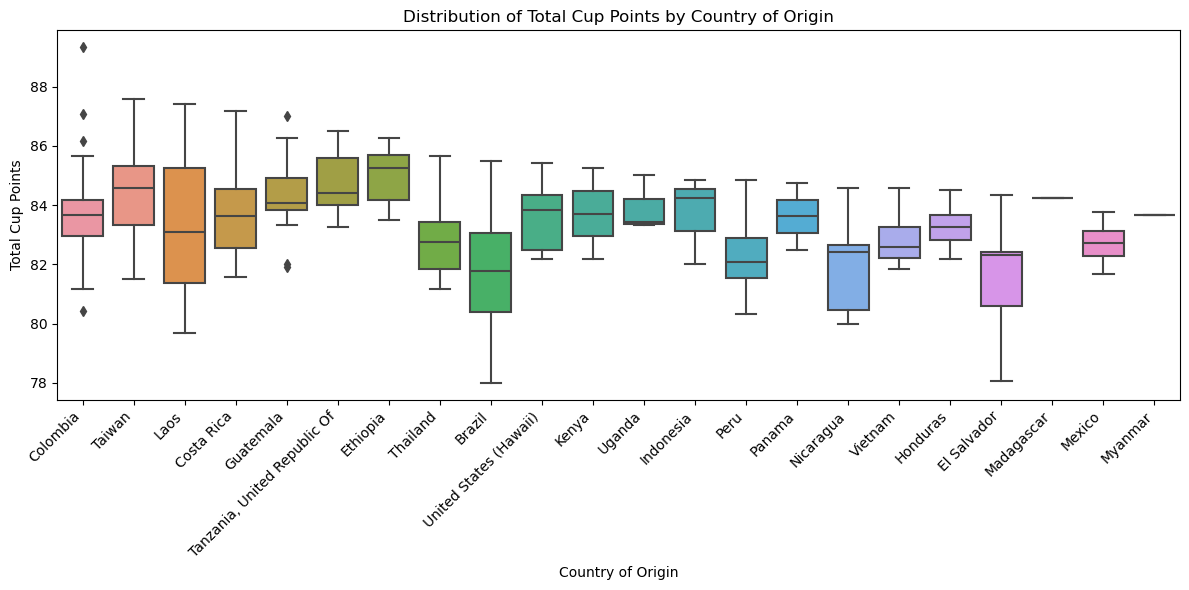

In [11]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=df,
    x="Country of Origin",
    y="Total Cup Points"
)

ax.set_title("Distribution of Total Cup Points by Country of Origin")
ax.set_xlabel("Country of Origin")
ax.set_ylabel("Total Cup Points")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [23]:
from ipywidgets import interact

flavor_cols = [
    'Aroma', 'Flavor', 'Aftertaste', 'Acidity',
    'Body', 'Balance', 'Sweetness', 'Overall'
]

country_widget = widgets.Dropdown(
    options=['All'] + sorted(df['Country of Origin'].dropna().unique().tolist()),
    description='Country:'
)

score_widget = widgets.FloatRangeSlider(
    description='Score range:',
    value=[df['Total Cup Points'].min(), df['Total Cup Points'].max()],
    min=df['Total Cup Points'].min(),
    max=df['Total Cup Points'].max(),
    step=0.25,
    continuous_update=False
)

def flavor_profile(country, score_range):
    subset = df.copy()
    
    
    subset = subset[
        (subset['Total Cup Points'] >= score_range[0]) &
        (subset['Total Cup Points'] <= score_range[1])
    ]
    
    
    if country != 'All':
        subset = subset[subset['Country of Origin'] == country]
    
    
    if len(subset) == 0:
        plt.figure(figsize=(6, 3))
        plt.text(0.5, 0.5, 'No coffees match this filter',
                 ha='center', va='center', fontsize=12)
        plt.axis('off')
        plt.show()
        return
    
    
    means = subset[flavor_cols].mean()
    
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x=means.index, y=means.values)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Mean score')
    plt.xlabel('Flavor attribute')
    
    title = "Flavor Profile"
    if country != 'All':
        title += f" – {country}"
    title += f" ({score_range[0]:.1f}–{score_range[1]:.1f} Total Cup Points)"
    plt.title(title)
    plt.ylim(0, 10)  # cupping scores are usually 0–10
    plt.tight_layout()
    plt.show()


interact(flavor_profile, country=country_widget, score_range=score_widget);


interactive(children=(Dropdown(description='Country:', options=('All', 'Brazil', 'Colombia', 'Costa Rica', 'El…

In [24]:

flavor_cols = [
    'Aroma', 'Flavor', 'Aftertaste', 'Acidity',
    'Body', 'Balance', 'Sweetness', 'Overall'
]


flavor_widget = widgets.Dropdown(
    description='Attribute:',
    options=flavor_cols,
    value='Acidity'   # default choice
)


def flavor_by_country(attribute):
    grouped = (
        df
        .groupby('Country of Origin')[attribute]
        .mean()
        .dropna()
        .sort_values(ascending=False)  # sort so highest bars appear first
    )
    
    # Make the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=grouped.index, y=grouped.values)
    plt.xticks(rotation=60, ha='right')
    plt.ylabel(f'Mean {attribute} score')
    plt.xlabel('Country of Origin')
    plt.title(f'Mean {attribute} by Country of Origin')
    plt.ylim(0, 10)   
    plt.tight_layout()
    plt.show()
    
interact(flavor_by_country, attribute=flavor_widget);

interactive(children=(Dropdown(description='Attribute:', index=3, options=('Aroma', 'Flavor', 'Aftertaste', 'A…

In [25]:
flavor_cols = [
    'Aroma', 'Flavor', 'Aftertaste', 'Acidity',
    'Body', 'Balance', 'Sweetness', 'Overall'
]

flavor_widget = widgets.Dropdown(
    description='Attribute:',
    options=flavor_cols,
    value='Acidity'
)

def flavor_diff_plot(attribute):
    global_mean = df[attribute].mean()
    
    means = (
        df
        .groupby('Country of Origin')[attribute]
        .mean()
        .dropna()
    )
    

    diffs = means - global_mean

    diffs = diffs.sort_values()
    

    plt.figure(figsize=(10, 8))
    

    for i, (country, diff) in enumerate(diffs.items()):
        plt.plot([0, diff], [country, country], linewidth=1)  # line from 0 to the dot
    

    plt.scatter(diffs.values, diffs.index)
    

    plt.axvline(0, color='gray', linestyle='--', linewidth=1)
    
    plt.xlabel(f"{attribute} (difference from global mean)")
    plt.ylabel("Country of Origin")
    plt.title(f"Countries Above/Below Global Average {attribute}")
    plt.tight_layout()
    plt.show()

interact(flavor_diff_plot, attribute=flavor_widget);


interactive(children=(Dropdown(description='Attribute:', index=3, options=('Aroma', 'Flavor', 'Aftertaste', 'A…

In [26]:
from ipywidgets import interact, IntSlider

TOTAL_COL = 'Total Cup Points'  

def total_points_diff_plot(min_samples=5):

    global_mean = df[TOTAL_COL].mean()
    

    stats = (
        df
        .groupby('Country of Origin')[TOTAL_COL]
        .agg(['mean', 'count'])
        .rename(columns={'mean': 'mean_points', 'count': 'n'})
        .dropna()
    )
    

    stats = stats[stats['n'] >= min_samples]
    if stats.empty:
        print("No countries with at least", min_samples, "samples.")
        return
    

    diffs = stats['mean_points'] - global_mean
    

    diffs = diffs.sort_values()
    

    plt.figure(figsize=(10, 8))
    
    for country, diff in diffs.items():
        plt.plot([0, diff], [country, country], linewidth=1)  # line from 0 to the dot
    
    plt.scatter(diffs.values, diffs.index)
    

    plt.axvline(0, color='gray', linestyle='--', linewidth=1)
    
    plt.xlabel("Total Cup Points (difference from global mean)")
    plt.ylabel("Country of Origin")
    plt.title("Countries Above/Below Global Average Total Cup Points")
    plt.tight_layout()
    plt.show()


interact(
    total_points_diff_plot,
    min_samples=IntSlider(description='Min # samples', min=1, max=30, step=1, value=5)
);

interactive(children=(IntSlider(value=5, description='Min # samples', max=30, min=1), Output()), _dom_classes=…

In [27]:

flavor_cols = [
    'Aroma', 'Flavor', 'Aftertaste', 'Acidity',
    'Body', 'Balance', 'Sweetness', 'Overall'
]


country_widget = widgets.Dropdown(
    description='Country:',
    options=sorted(df['Country of Origin'].dropna().unique().tolist())
)

def flavor_heatmap(country):
    subset = df[df['Country of Origin'] == country].copy()
    
    if subset.empty:
        plt.figure(figsize=(5, 3))
        plt.text(0.5, 0.5, 'No data for this country',
                 ha='center', va='center', fontsize=12)
        plt.axis('off')
        plt.show()
        return
    

    grouped = (
        subset
        .groupby('Processing Method')[flavor_cols]
        .mean()
        .dropna(how='all')  
    )
    
    if grouped.empty:
        plt.figure(figsize=(5, 3))
        plt.text(0.5, 0.5, 'No flavor scores for this country',
                 ha='center', va='center', fontsize=12)
        plt.axis('off')
        plt.show()
        return
    
    #Plot heatmap
    plt.figure(figsize=(10, 4 + 0.4*len(grouped)))  # taller if more methods
    sns.heatmap(
        grouped,
        annot=True, fmt=".1f",   
        vmin=0, vmax=10          
    )
    plt.title(f"Flavor Profile by Processing Method – {country}")
    plt.xlabel("Flavor Attribute")
    plt.ylabel("Processing Method")
    plt.tight_layout()
    plt.show()


interact(flavor_heatmap, country=country_widget);


interactive(children=(Dropdown(description='Country:', options=('Brazil', 'Colombia', 'Costa Rica', 'El Salvad…

“within this country, how do different processing methods change the flavor profile?”

In [28]:
flavor_cols = [
    'Aroma', 'Flavor', 'Aftertaste', 'Acidity',
    'Body', 'Balance', 'Sweetness', 'Overall'
]



country_widget = widgets.Dropdown(
    description='Country:',
    options=sorted(df['Country of Origin'].dropna().unique().tolist())
)

x_attr_widget = widgets.Dropdown(
    description='X axis:',
    options=flavor_cols,
    value='Acidity'
)

y_attr_widget = widgets.Dropdown(
    description='Y axis:',
    options=flavor_cols,
    value='Body'
)


def flavor_scatter(country, x_attr, y_attr):
    # Filter to chosen country
    subset = df[df['Country of Origin'] == country].copy()
    
    if subset.empty:
        plt.figure(figsize=(5, 3))
        plt.text(0.5, 0.5, 'No data for this country',
                 ha='center', va='center', fontsize=12)
        plt.axis('off')
        plt.show()
        return
    

    if x_attr == y_attr:
        plt.figure(figsize=(5, 3))
        plt.text(0.5, 0.5, 'Pick two different attributes for X and Y',
                 ha='center', va='center', fontsize=12)
        plt.axis('off')
        plt.show()
        return
    

    g = sns.relplot(
        data=subset,
        x=x_attr,
        y=y_attr,
        hue='Processing Method',
        kind='scatter',
        height=5,
        aspect=1.3
    )
    
    g.set(
        title=f"{y_attr} vs {x_attr} in {country} (colored by Processing Method)",
        xlabel=x_attr,
        ylabel=y_attr
    )


interact(
    flavor_scatter,
    country=country_widget,
    x_attr=x_attr_widget,
    y_attr=y_attr_widget
);


interactive(children=(Dropdown(description='Country:', options=('Brazil', 'Colombia', 'Costa Rica', 'El Salvad…

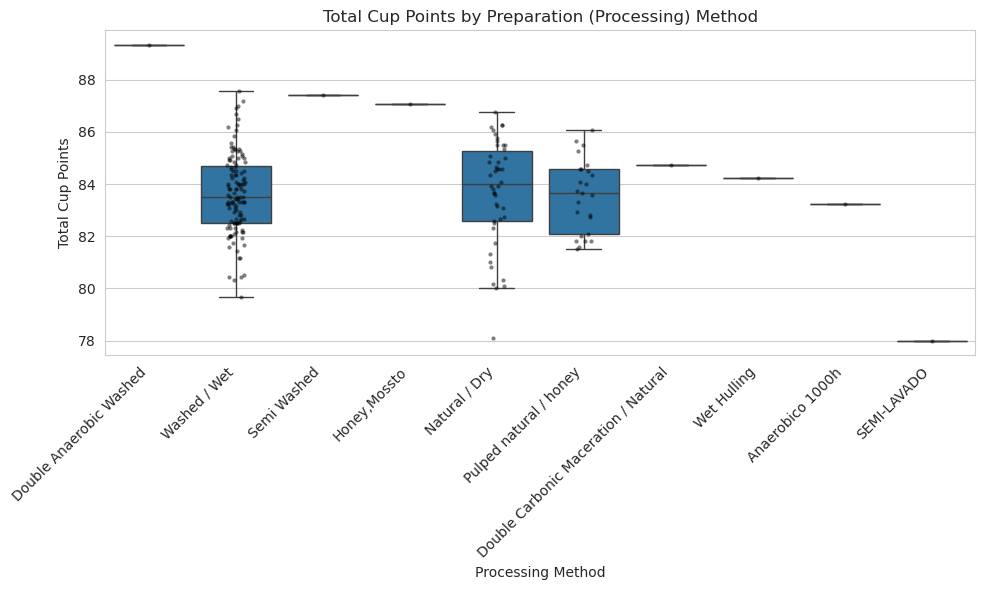

In [29]:
plt.figure(figsize=(10, 6))

# Boxplot of Total Cup Points by Processing Method
ax = sns.boxplot(
    data=df,
    x="Processing Method",
    y="Total Cup Points",
    showfliers=False  
)


sns.stripplot(
    data=df,
    x="Processing Method",
    y="Total Cup Points",
    color="black",
    size=3,
    alpha=0.5
)

ax.set_title("Total Cup Points by Preparation (Processing) Method")
ax.set_xlabel("Processing Method")
ax.set_ylabel("Total Cup Points")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


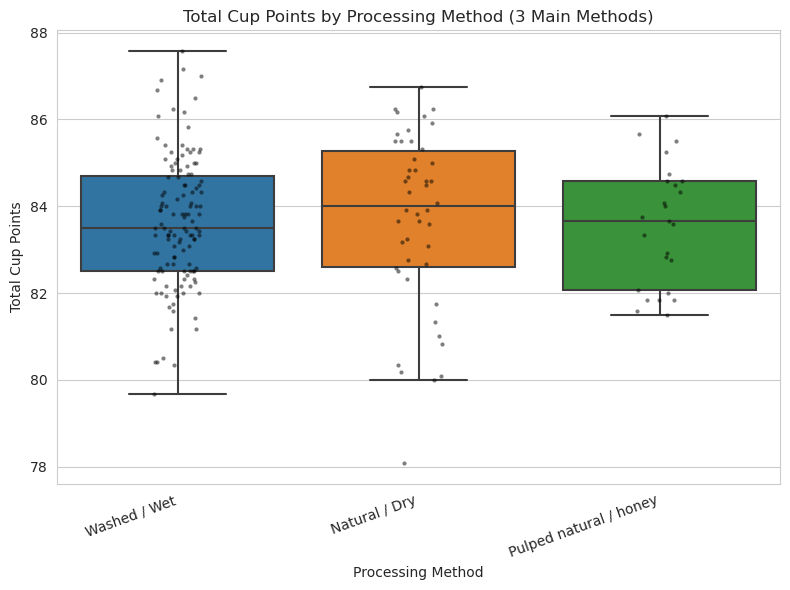

In [22]:
methods_of_interest = [
    "Washed / Wet",
    "Natural / Dry",
    "Pulped natural / honey"
]

df_3 = df[df["Processing Method"].isin(methods_of_interest)].copy()

plt.figure(figsize=(8, 6))

ax = sns.boxplot(
    data=df_3,
    x="Processing Method",
    y="Total Cup Points",
    showfliers=False
)

sns.stripplot(
    data=df_3,
    x="Processing Method",
    y="Total Cup Points",
    color="black",
    size=3,
    alpha=0.5
)

ax.set_title("Total Cup Points by Processing Method (3 Main Methods)")
ax.set_xlabel("Processing Method")
ax.set_ylabel("Total Cup Points")

plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()


In [30]:
methods_of_interest = [
    "Washed / Wet",
    "Natural / Dry",
    "Pulped natural / honey"
]

country_widget = widgets.Dropdown(
    description='Country:',
    options=['All'] + sorted(df['Country of Origin'].dropna().unique().tolist())
)

def method_vs_score_3(country):

    subset = df[df["Processing Method"].isin(methods_of_interest)].copy()
    

    if country != 'All':
        subset = subset[subset['Country of Origin'] == country]
    
    if subset.empty:
        plt.figure(figsize=(5, 3))
        plt.text(0.5, 0.5, 'No data for this filter',
                 ha='center', va='center')
        plt.axis('off')
        plt.show()
        return
    
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(
        data=subset,
        x="Processing Method",
        y="Total Cup Points",
        showfliers=False
    )
    sns.stripplot(
        data=subset,
        x="Processing Method",
        y="Total Cup Points",
        color="black",
        size=3,
        alpha=0.5
    )
    
    title = "Total Cup Points by Processing Method (3 Main Methods)"
    if country != 'All':
        title += f" – {country}"
    ax.set_title(title)
    ax.set_xlabel("Processing Method")
    ax.set_ylabel("Total Cup Points")
    plt.xticks(rotation=20, ha='right')
    plt.tight_layout()
    plt.show()

interact(method_vs_score_3, country=country_widget);


interactive(children=(Dropdown(description='Country:', options=('All', 'Brazil', 'Colombia', 'Costa Rica', 'El…